In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from empyrical import max_drawdown

import copy
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
print(pd.__version__)

%matplotlib inline

0.25.2


In [31]:
weights = pd.read_excel('New Weights.xlsx')
weights = weights.set_index(['CLIENT_NR','RISK_PROFILE'])
weights.head()

,,EQ_USA,EQ_EMU,EQ_EM,EQ_CH,LIQ_CHF,LIQ_EUR,LIQ_USD,FI_USA_CORP,FI_USA_SOV,FI_EMU,FI_EM,AI_RE,AI_COM,AI_HF,MIX
CLIENT_NR,RISK_PROFILE,,,,,,,,,,,,,,,
123456,Medium,0.12,0.23,NaN,0.01,0.05,NaN,NaN,0.34,NaN,0.05,NaN,NaN,NaN,0.11,0.09
234567,Enhanced,0.10,0.10,0.10,0.10,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,NaN,0.15,0.05
345678,High,NaN,0.25,NaN,0.35,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,0.30
232323,Medium,0.05,0.08,0.09,0.09,0.09,0.09,0.05,0.05,0.06,0.07,0.14,0.13,NaN,NaN,0.01
242424,High,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
prices = pd.read_excel('df31.xlsx')
prices['Date'] = pd.to_datetime(prices['Date'], dayfirst=True)
prices = prices.set_index('Date')
prices.head()

,EQ_USA,EQ_EMU,EQ_CH,EQ_EM,LIQ_CHF,LIQ_EUR,LIQ_USD,FI_USA_CORP,FI_USA_SOV,FI_EMU,...,DBP,DBA,USO,MNA,RLY,HRX,MEDIUM,LOW,HIGH,ENHANCED
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-08,-0.180233,-0.089336,-0.101143,-0.041900,-0.138919,0.044100,-0.050690,-0.086175,-0.014469,-0.023185,...,0.103311,0.057674,-0.077766,-0.018703,-0.073373,0.013806,-0.007949,0.000000,-0.014469,-0.042296
2011-01-09,-0.014539,-0.066830,0.014258,-0.056953,-0.183996,-0.007852,-0.046676,-0.114935,-0.009121,-0.049084,...,-0.152461,-0.130167,-0.116488,-0.025548,0.030097,0.024690,-0.045873,-0.000218,-0.009121,-0.174728
2011-01-10,0.245052,0.108853,0.164487,0.097583,0.158646,0.012821,0.106067,0.155474,0.061523,0.026293,...,0.077018,0.024941,0.172188,0.033708,0.031567,-0.013398,-0.040941,-0.000436,0.061523,0.212501
2011-01-11,-0.015318,-0.047876,0.058959,0.008741,-0.124966,0.017290,-0.026920,-0.003783,-0.055783,-0.019126,...,0.005918,-0.046695,0.085059,-0.016908,0.006112,0.008433,0.011384,0.000218,-0.055783,-0.021090


In [33]:
benchmark = pd.read_excel('Benchmarks.xlsx')
benchmark['Date'] = pd.to_datetime(benchmark['Date'], dayfirst=True)
benchmark = benchmark.set_index('Date')
benchmark['LOW_CUM_RETURN'] = (benchmark['LOW'].add(1).cumprod() - 1).fillna(0)
benchmark['MODERATE_CUM_RETURN'] = (benchmark['MODERATE'].add(1).cumprod() - 1).fillna(0)
benchmark['MEDIUM_CUM_RETURN'] = (benchmark['MEDIUM'].add(1).cumprod() - 1).fillna(0)
benchmark['ENHANCED_CUM_RETURN'] = (benchmark['ENHANCED'].add(1).cumprod() - 1).fillna(0)
benchmark['HIGH_CUM_RETURN'] = (benchmark['HIGH'].add(1).cumprod() - 1).fillna(0)
benchmark

,LOW,MODERATE,MEDIUM,ENHANCED,HIGH,LOW_CUM_RETURN,MODERATE_CUM_RETURN,MEDIUM_CUM_RETURN,ENHANCED_CUM_RETURN,HIGH_CUM_RETURN
Date,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-08,-0.086175,-0.014469,-0.023185,-0.046039,-0.031134,-0.086175,-0.014469,-0.023185,-0.046039,-0.031134
2011-01-09,-0.114935,-0.009121,-0.049084,0.005914,0.081060,-0.191205,-0.023458,-0.071131,-0.040397,0.047402
2011-01-10,0.155474,0.061523,0.026293,0.134290,-0.010807,-0.065459,0.036622,-0.046708,0.088468,0.036082
2011-01-11,-0.003783,-0.055783,-0.019126,-0.004769,-0.026488,-0.068994,-0.021205,-0.064941,0.083277,0.008639
...,...,...,...,...,...,...,...,...,...,...
2018-01-08,0.046883,0.196227,0.028777,0.008083,0.021845,1.417160,5.051171,0.931294,2.120320,1.149792
2018-01-09,-0.025835,-0.004825,0.006993,-0.026933,-0.059857,1.354712,5.021975,0.944800,2.036282,1.021111
2018-01-10,-0.107516,-0.030478,0.027778,-0.051800,-0.024002,1.101542,4.838440,0.998822,1.879002,0.972601


In [34]:
cols = []
for client_nr,risk_profile in weights.index.values:
    combined_returns = None
    for col in weights.columns:
        w = weights.loc[(client_nr,risk_profile)][col]
        if not np.isnan(w):
            returns = prices[col] * w
        else:
            continue
        if isinstance(combined_returns, pd.Series):
            combined_returns += returns
        else:
            combined_returns = returns
    returns_col = '%d_%s_RETURN'%(client_nr,risk_profile.upper())
    cum_returns_col = '%d_%s_CUM_RETURN'%(client_nr,risk_profile.upper())
    cols.append(returns_col)
    cols.append(cum_returns_col)
    prices[returns_col] = combined_returns
    prices[cum_returns_col] = ((1+prices[returns_col]).cumprod()-1).fillna(0)
    print('CLIENT_NR : %d, RISK_PROFILE : %8s, CUM RETURN : %.2f'%(client_nr, risk_profile, prices[cum_returns_col][-1]))

CLIENT_NR : 123456, RISK_PROFILE :   Medium, CUM RETURN : 0.90
CLIENT_NR : 234567, RISK_PROFILE : Enhanced, CUM RETURN : 1.27
CLIENT_NR : 345678, RISK_PROFILE :     High, CUM RETURN : 1.47
CLIENT_NR : 232323, RISK_PROFILE :   Medium, CUM RETURN : 1.21
CLIENT_NR : 242424, RISK_PROFILE :     High, CUM RETURN : 0.29
CLIENT_NR : 212121, RISK_PROFILE : Enhanced, CUM RETURN : 0.75
CLIENT_NR : 233333, RISK_PROFILE :   Medium, CUM RETURN : 1.60
CLIENT_NR : 333333, RISK_PROFILE :      Low, CUM RETURN : 1.52


In [35]:
prices[cols]

,123456_MEDIUM_RETURN,123456_MEDIUM_CUM_RETURN,234567_ENHANCED_RETURN,234567_ENHANCED_CUM_RETURN,345678_HIGH_RETURN,345678_HIGH_CUM_RETURN,232323_MEDIUM_RETURN,232323_MEDIUM_CUM_RETURN,242424_HIGH_RETURN,242424_HIGH_CUM_RETURN,212121_ENHANCED_RETURN,212121_ENHANCED_CUM_RETURN,233333_MEDIUM_RETURN,233333_MEDIUM_CUM_RETURN,333333_LOW_RETURN,333333_LOW_CUM_RETURN
Date,,,,,,,,,,,,,,,,
2011-01-07,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
2011-01-08,-0.094331,-0.094331,-0.070940,-0.070940,-0.085510,-0.085510,-0.058271,-0.058271,-0.101143,-0.101143,-0.101993,-0.101993,-0.071444,-0.071444,-0.073993,-0.073993
2011-01-09,-0.075031,-0.162285,-0.030441,-0.099222,-0.046415,-0.127957,-0.029006,-0.085587,0.014258,-0.088327,-0.011380,-0.112213,-0.049717,-0.117609,-0.088786,-0.156210
2011-01-10,0.124832,-0.057711,0.094468,-0.014127,0.125566,-0.018457,0.097138,0.003237,0.164487,0.061632,0.109968,-0.014584,0.108613,-0.021770,0.121794,-0.053441
2011-01-11,-0.043571,-0.098768,-0.027843,-0.041576,-0.059004,-0.076373,-0.020596,-0.017425,0.058959,0.124224,-0.013715,-0.028099,-0.040350,-0.061242,-0.051007,-0.101722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08,0.023220,1.409026,0.024204,1.631982,-0.033885,2.127556,0.026812,1.572749,-0.080040,0.572179,0.005902,1.111114,0.035516,2.063275,0.083218,2.397392
2018-01-09,-0.043246,1.304845,-0.024300,1.568025,-0.064612,1.925478,-0.030262,1.494891,-0.049795,0.493893,-0.036296,1.034489,-0.023483,1.991340,-0.024886,2.312845
2018-01-10,-0.097121,1.080996,-0.055601,1.425240,-0.080158,1.690976,-0.036096,1.404837,-0.002320,0.490428,-0.066880,0.898423,-0.060215,1.811216,-0.047034,2.157027


In [36]:
prices.to_excel('Prices_With_Returns.xlsx')
benchmark.to_excel('Benchmark_With_Returns.xlsx')

In [37]:
def plot_returns(client_nr, risk_profile, prices, benchkmark, start_dates, end_dates, xlabels):
    benchmark_returns, portfolio_returns = [], []

    for start_date, end_date in zip(start_dates, end_dates):
        dt_rng = pd.date_range(start=start_date, end=end_date, )
        sub_df1 = copy.deepcopy(prices[prices.index.isin(dt_rng)])
        if sub_df1.shape[0] > 0:
            cum_return_col = '%d_%s_CUM_RETURN'%(client_nr,risk_profile.upper())
            portfolio_returns.append(sub_df1[cum_return_col][-1]*100)
        else:
            portfolio_returns.append(0)
        
        sub_df2 = copy.deepcopy(benchkmark[benchkmark.index.isin(dt_rng)])
        if sub_df2.shape[0] > 0:
            cum_return_col = '%s_CUM_RETURN'%risk_profile.upper()
            benchmark_returns.append(sub_df2[cum_return_col][-1]*100)
        else:
            benchmark_returns.append(0)
    
    with plt.style.context(('seaborn', 'ggplot')):
        fig = plt.figure(figsize=(15,8))
        bar1_range, bar2_range = range(0, 3*len(portfolio_returns),3), range(1, 3*len(portfolio_returns),3)
        
        plt.bar(bar1_range, benchmark_returns, width=0.95, label='Cumulative Returns Benchmark', color='lawngreen', alpha=0.8)
        plt.bar(bar2_range, portfolio_returns, width=0.95, label='Cumulative Returns Portfolio', color='royalblue', alpha=0.8)
        for i, ret in zip(bar1_range, benchmark_returns):
            if ret >= 0:
                plt.text(i, ret, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='bottom', fontsize=12)
            else:
                plt.text(i, ret, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='top', fontsize=12)
        
        for i, ret in zip(bar2_range, portfolio_returns):
            if ret >= 0:
                plt.text(i, ret, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='bottom', fontsize=12)
            else:
                plt.text(i, ret, '%.2f%%'%ret, horizontalalignment='center',verticalalignment='top', fontsize=12)
        
        plt.xticks(np.arange(0.5, 3*len(xlabels), len(xlabels)), xlabels)
        
        plt.grid(axis='x')
        plt.title('Benchmark vs Portfolio Cumulative Returns CLIENT_NR : %s, RISK_PROFILE : %s'%(client_nr, risk_profile.upper()))
        plt.legend(loc='best')
        
        fig.canvas.draw()
        yticks = plt.yticks()
        plt.yticks(yticks[0], ['%.1f%%'%val for val in yticks[0]])
        
        plt.savefig('%s_%s_cum_return.png'%(client_nr, risk_profile.upper()))
    return benchmark_returns, portfolio_returns

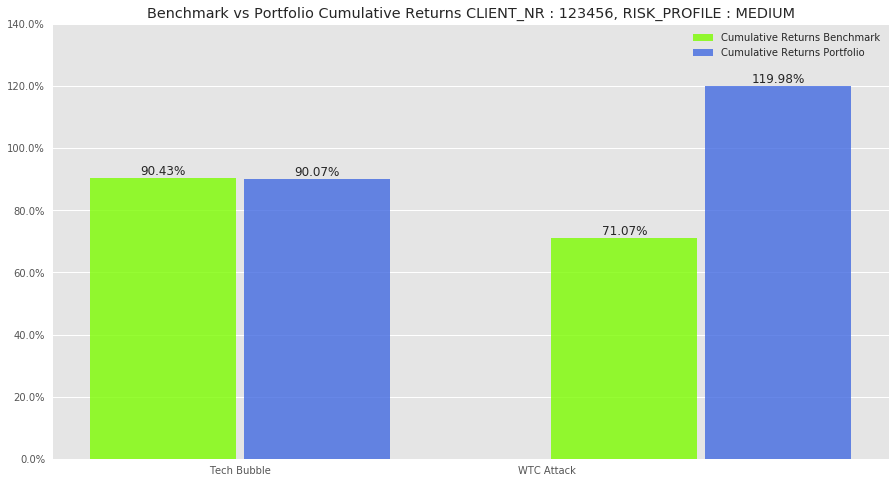

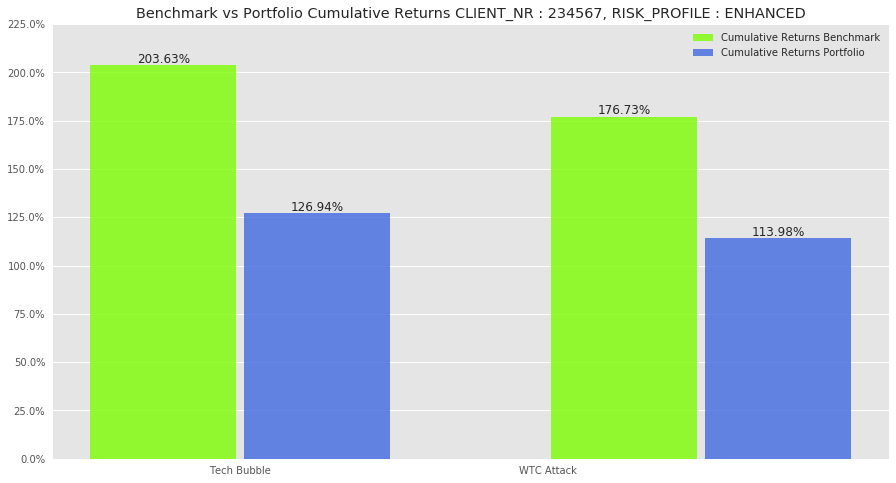

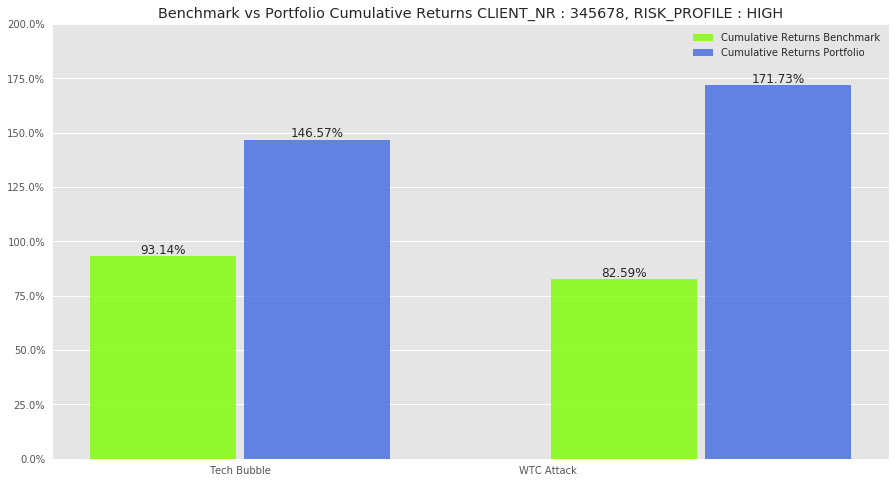

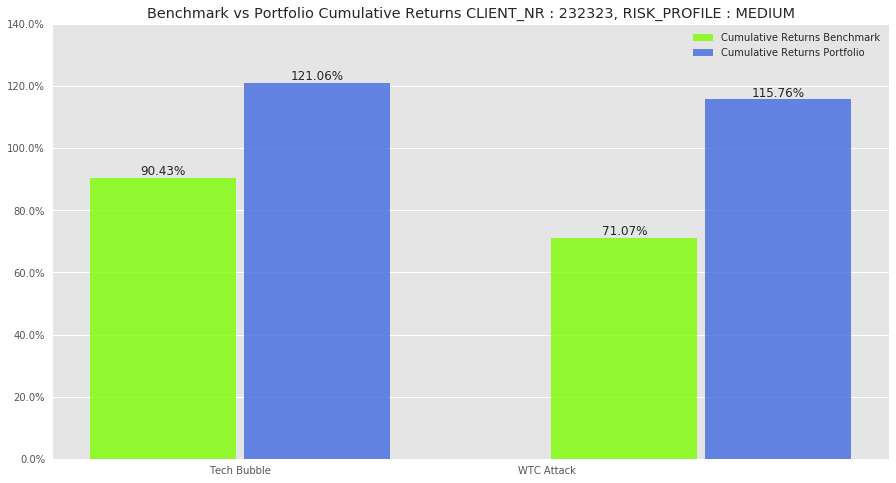

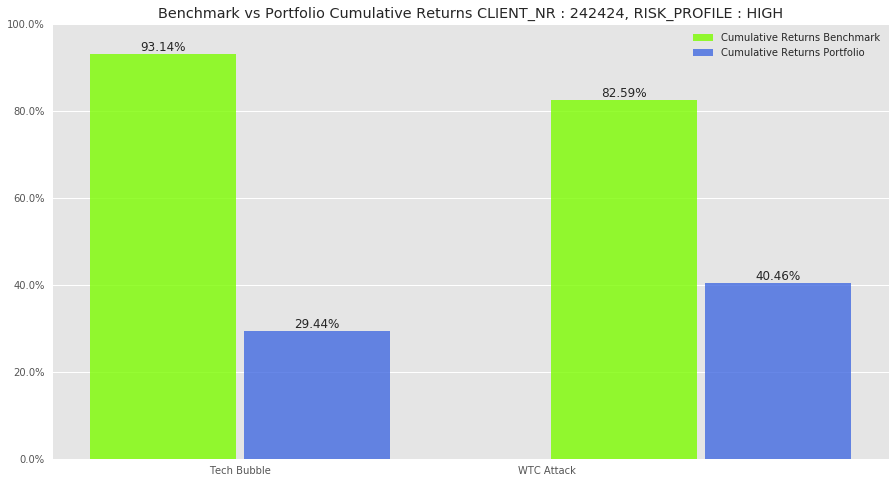

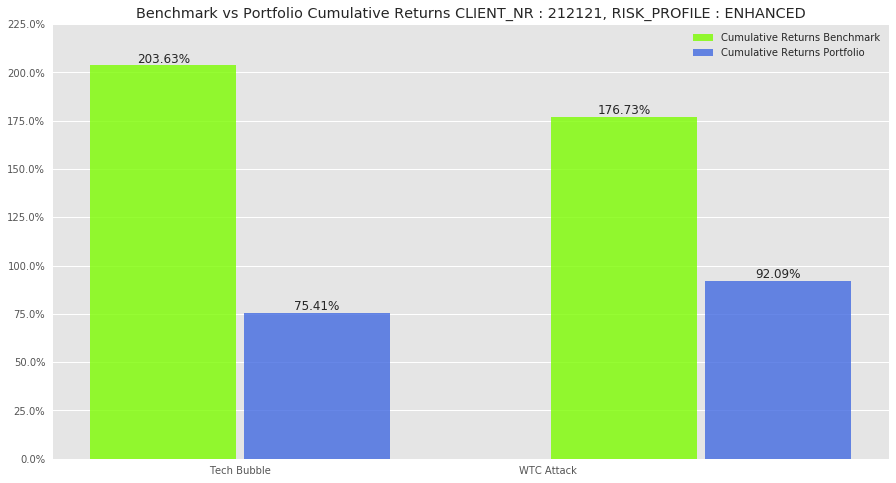

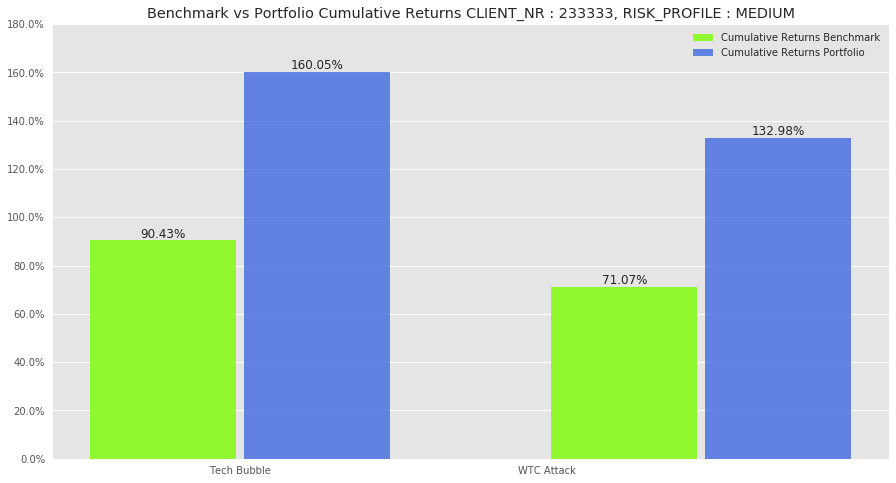

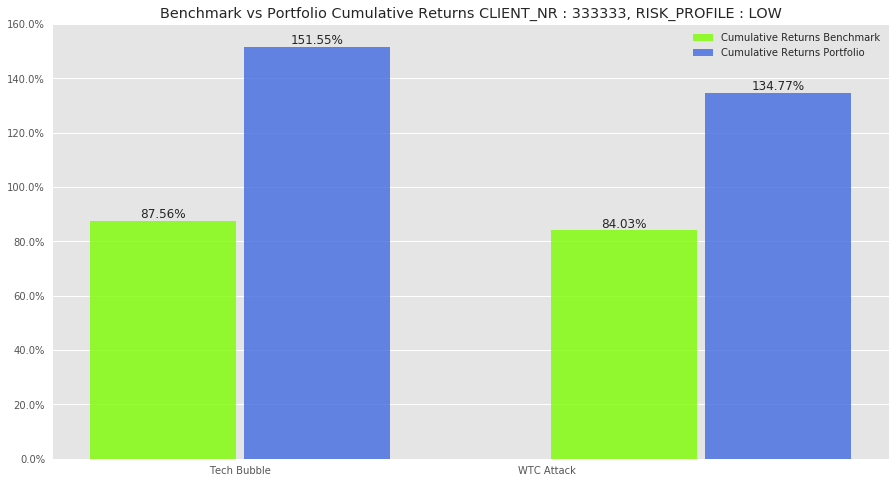

In [38]:
start_dates = ['7-1-2011', '7-31-2015', ]
end_dates = ['12-1-2018', '2-10-2016', ]
xlabels = ['Tech Bubble', 'WTC Attack', ]

benchmark_rets, port_rets = [], []
for client_nr, risk_profile in weights.index:
    b, p = plot_returns(client_nr, risk_profile, prices, benchmark, start_dates, end_dates, xlabels)
    benchmark_rets.append(b)
    port_rets.append(p)

In [39]:
benchmark_rets = np.array(benchmark_rets)
port_rets = np.array(port_rets)

plot_data = {}
for i, label in enumerate(xlabels):
    plot_data[label + '_CUM_RET_BENCHMARK'] = benchmark_rets[:,i] 
    plot_data[label + '_CUM_RET_PORTFOLIO'] = port_rets[:,i] 

plot_dataframe = pd.DataFrame(plot_data, index=weights.index)
plot_dataframe.to_excel('plot_data_cumulative_returns.xlsx')
plot_dataframe

,,Tech Bubble_CUM_RET_BENCHMARK,Tech Bubble_CUM_RET_PORTFOLIO,WTC Attack_CUM_RET_BENCHMARK,WTC Attack_CUM_RET_PORTFOLIO
CLIENT_NR,RISK_PROFILE,,,,
123456,Medium,90.428337,90.069974,71.070297,119.979843
234567,Enhanced,203.628155,126.940161,176.733224,113.983985
345678,High,93.144286,146.573535,82.585228,171.732953
232323,Medium,90.428337,121.060424,71.070297,115.755781
242424,High,93.144286,29.439916,82.585228,40.455043
212121,Enhanced,203.628155,75.405959,176.733224,92.091633
233333,Medium,90.428337,160.045047,71.070297,132.975816
333333,Low,87.560106,151.554541,84.029533,134.766594


In [45]:
def max_dd(returns):
    """Assumes returns is a pandas Series"""
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

def plot_dradowns(client_nr, risk_profile, prices, benchmark, start_dates, end_dates, xlabels):
    max_drawdowns_benchmark, max_dd_portfolio = [], []

    for start_date, end_date in zip(start_dates, end_dates):
        dt_rng = pd.date_range(start=start_date, end=end_date)
        sub_df1 = copy.deepcopy(prices[prices.index.isin(dt_rng)])
        sub_df2 = copy.deepcopy(benchmark[benchmark.index.isin(dt_rng)])
        
        if sub_df1.shape[0] > 0:
            col_name = '%d_%s_RETURN'%(client_nr, risk_profile.upper())
            mdd_p, start_p, end_p = max_dd(sub_df1[col_name].fillna(0))
        else:
            mdd_p, start_p,end_p = 0, 0, 0
        
        if sub_df2.shape[0] > 0:
            mdd_b, start_b, end_b = max_dd(sub_df2[risk_profile.upper()].fillna(0))
        else:
            mdd_b, start_b,end_b = 0, 0, 0
            
        max_drawdowns_benchmark.append(mdd_b*100)
        max_dd_portfolio.append(mdd_p*100)
    
    with plt.style.context(('seaborn', 'ggplot')):
        fig = plt.figure(figsize=(15,8))
        bar1_range, bar2_range = range(0, 3*len(max_drawdowns_benchmark),3), range(1, 3*len(max_drawdowns_benchmark),3)
        
        plt.bar(bar1_range, max_drawdowns_benchmark, width=0.95, label='Max Drawdowns Benchmark', color='lawngreen', alpha=0.8)
        plt.bar(bar2_range, max_dd_portfolio, width=0.95, label='Max Drawdowns Portfolio', color='royalblue', alpha=0.8)
        
        for i, dd in zip(bar1_range, max_drawdowns_benchmark):
            if dd >= 0:
                plt.text(i, dd, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='bottom', fontsize=12)
            else:
                plt.text(i, dd, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='top', fontsize=12)

        for i, dd in zip(bar2_range, max_dd_portfolio):
            if dd >= 0:
                plt.text(i, dd, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='bottom', fontsize=12)
            else:
                plt.text(i, dd, '%.2f%%'%dd, horizontalalignment='center',verticalalignment='top', fontsize=12)
        
        plt.xticks(np.arange(0.5, 3*len(xlabels), len(xlabels)), xlabels)
        plt.grid(axis='x')
        plt.title('Benchmark vs Portfolio Max Drawdowns CLIENT_NR : %s, RISK_PROFILE : %s'%(client_nr,risk_profile.upper()))
        plt.legend(loc='best')
        
        fig.canvas.draw()
        yticks = plt.yticks()
        plt.yticks(yticks[0], ['%.1f%%'%val for val in yticks[0]])
        
        plt.savefig('%s_%s_max_dd.png'%(client_nr, risk_profile.upper()))
    return max_drawdowns_benchmark, max_dd_portfolio

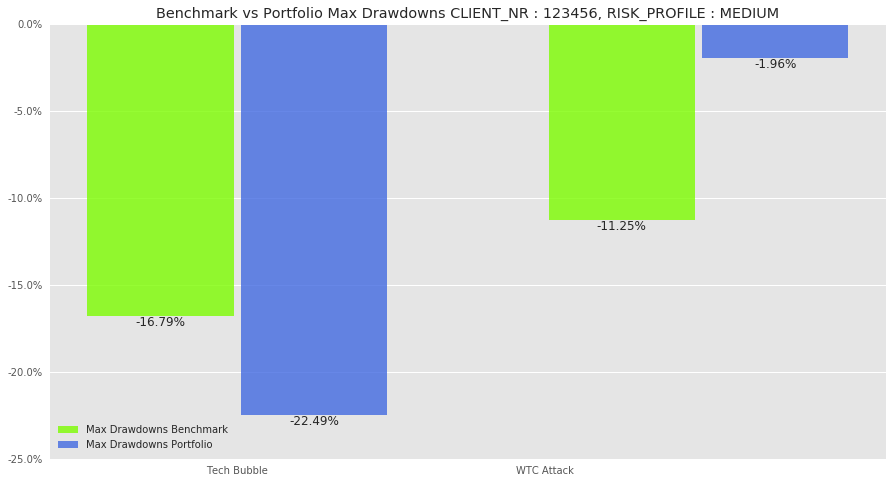

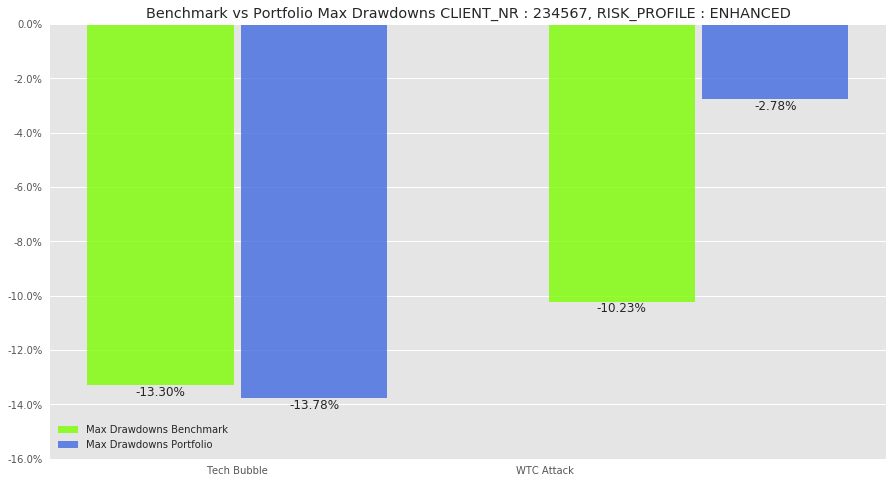

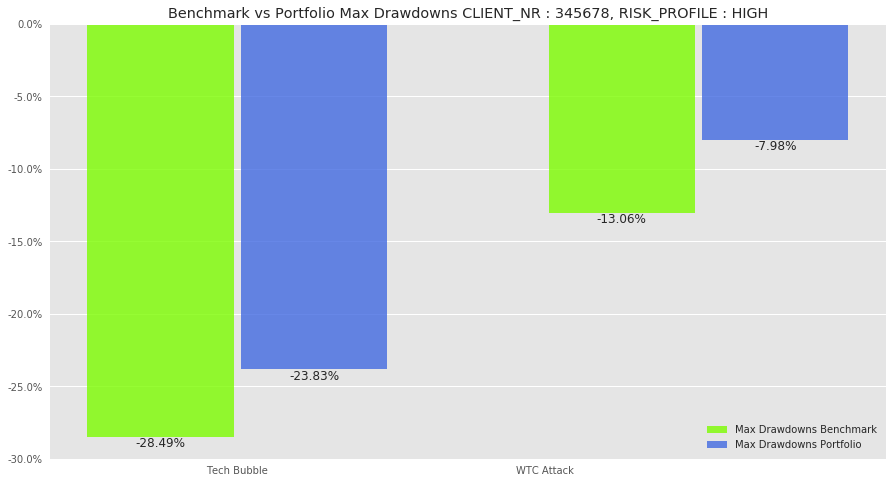

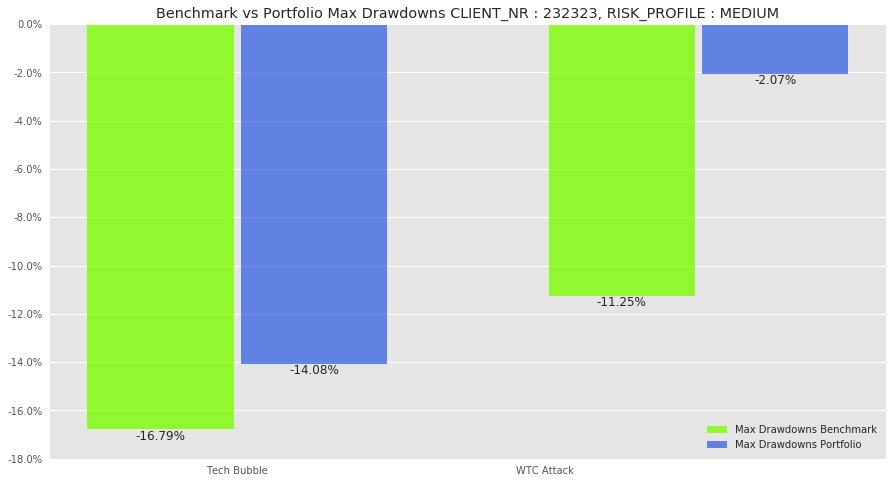

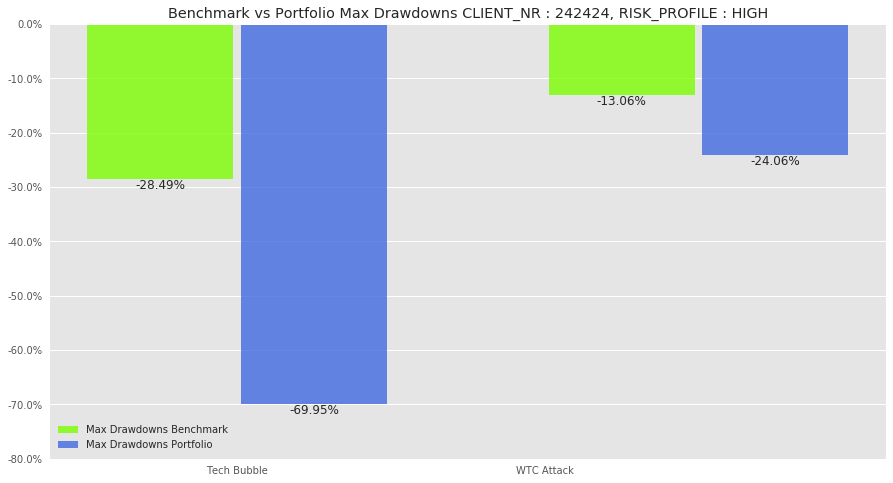

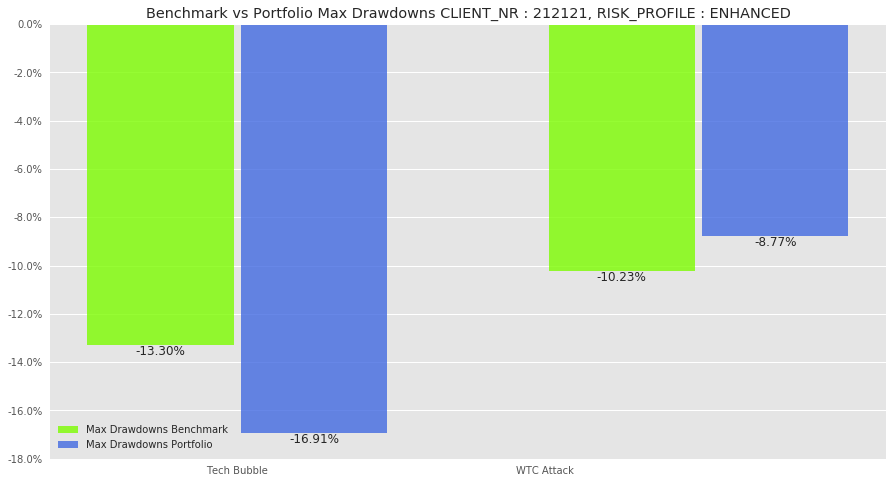

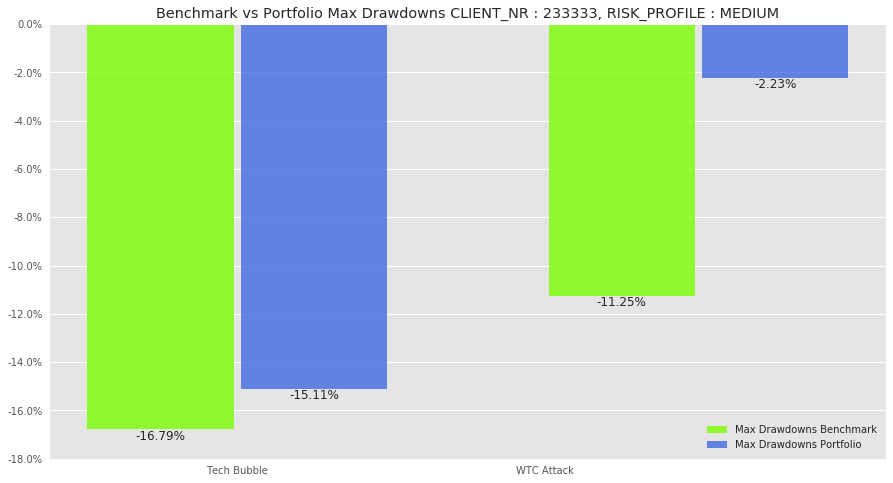

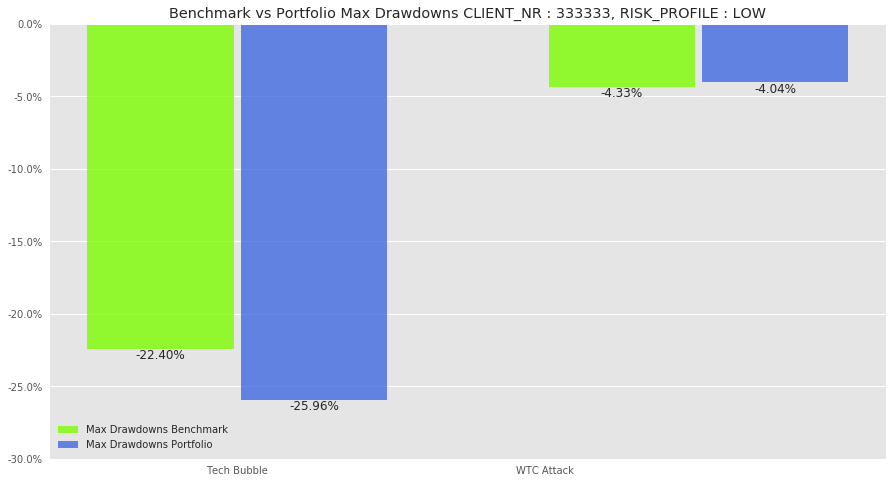

In [46]:
start_dates = ['7-1-2011', '7-31-2015', ]
end_dates = ['12-1-2018', '2-10-2016', ]
xlabels = ['Tech Bubble', 'WTC Attack',]

benchmark_dds, port_dds = [], []
for client_nr, risk_profile in weights.index:
    b, p = plot_dradowns(client_nr, risk_profile, prices, benchmark, start_dates, end_dates, xlabels)
    benchmark_dds.append(b)
    port_dds.append(p)

In [42]:
benchmark_dds = np.array(benchmark_dds)
port_dds = np.array(port_dds)

plot_data = {}
for i, label in enumerate(xlabels):
    plot_data[label + '_MAX_DD_BENCHMARK'] = benchmark_dds[:,i] 
    plot_data[label + '_MAX_DD_PORTFOLIO'] = port_dds[:,i] 

plot_dataframe = pd.DataFrame(plot_data, index=weights.index)
plot_dataframe.to_excel('plot_data_max_dd.xlsx')
plot_dataframe

,,Tech Bubble_MAX_DD_BENCHMARK,Tech Bubble_MAX_DD_PORTFOLIO,WTC Attack_MAX_DD_BENCHMARK,WTC Attack_MAX_DD_PORTFOLIO
CLIENT_NR,RISK_PROFILE,,,,
123456,Medium,-16.785858,-22.491554,-11.249126,-1.957608
234567,Enhanced,-13.295975,-13.775950,-10.232076,-2.776140
345678,High,-28.493006,-23.832423,-13.056935,-7.981603
232323,Medium,-16.785858,-14.076183,-11.249126,-2.067545
242424,High,-28.493006,-69.950604,-13.056935,-24.058280
212121,Enhanced,-13.295975,-16.913081,-10.232076,-8.765918
233333,Medium,-16.785858,-15.108824,-11.249126,-2.227274
333333,Low,-22.404747,-25.956585,-4.333188,-4.036158
